In [1]:
from utils_review import *

## Zeeman's Primary and Secondary Waves 

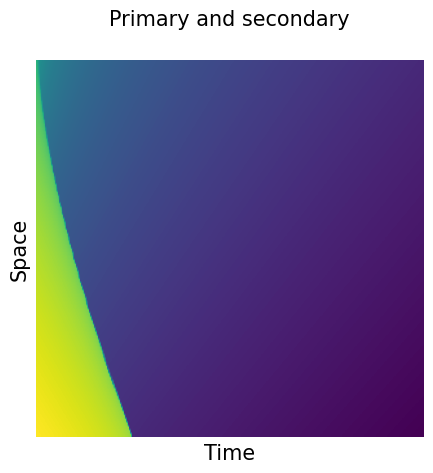

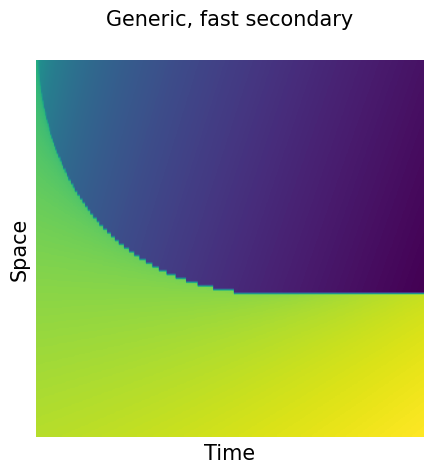

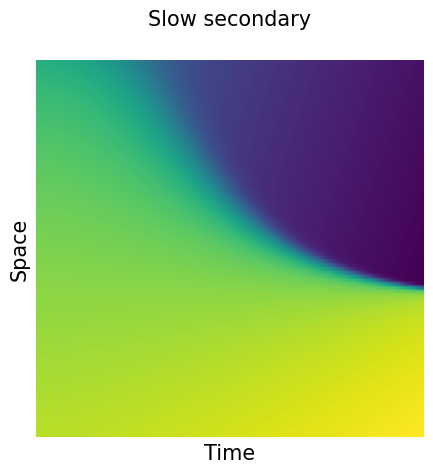

In [2]:
def dx_cusp(t, conc, ap_positions, param):
    u = conc[:]
    epsilon=param["epsilon"]
    mix=param["mix"]
    du=epsilon*(-0.05*t + 10*(ap_positions+mix*t)*u-u*u*u)
    return np.array([du])


ode_param = {
    "epsilon" : 1,
    "mix" : 0.0
}
    

times = np.linspace(-100, 0, 300)
n_cells = 100
ap_positions = np.linspace(1.0, 0.0, n_cells)
init_conc = 1.5*np.ones((1, n_cells))

results = integrate(dx_cusp, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions,ode_param, )).y

init_conc=np.array([results[:,-1]])

times = np.linspace(0, 1000, 300)
n_cells = 100
ap_positions = np.linspace(1.0, 0.0, n_cells)

results = integrate(dx_cusp, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions,ode_param, )).y

plot_kymo(results, 'Primary and secondary')

ode_param["mix"]=0.002
results = integrate(dx_cusp, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions,ode_param, )).y

plot_kymo(results,  'Generic, fast secondary')

#ode_param["mix"]=0.0
ode_param["epsilon"]=0.001
results = integrate(dx_cusp, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions,ode_param, )).y


plot_kymo(results, 'Slow secondary')






## Original Clock and Wavefront

Simulating the Cusp catastrophe coupled to a clock, here we simply implement a periodic kick

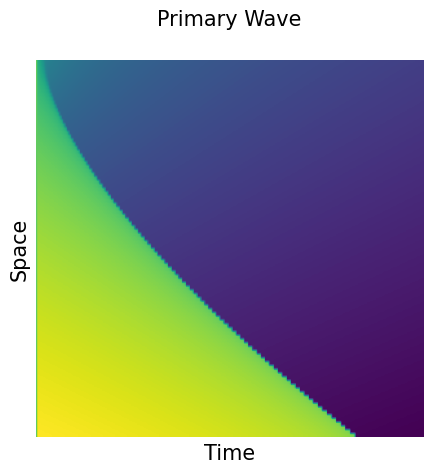

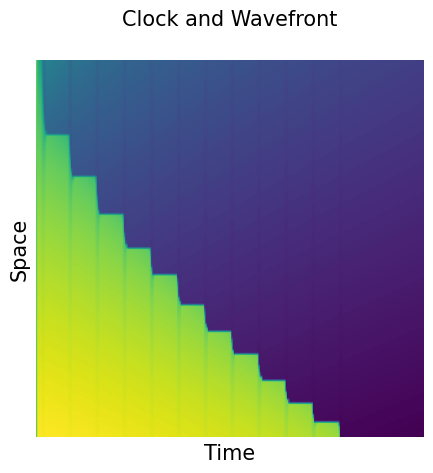

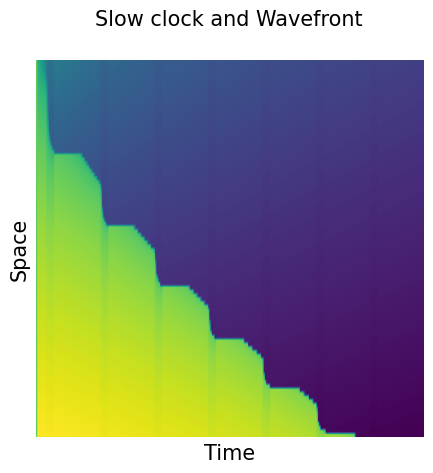

In [3]:
def dx_CW(t, conc, ap_positions,param):
    #we put a flag in param to turn on/off the clock
    u = conc[:]
    #notice the linear term in u has no time component here
    du=(-0.05*t + 10*(ap_positions)*u-u*u*u)
    omega=param["omega_clock"]
    flag=param["flag"]
    if (np.sin(omega*t)>0.9) and (flag==1):
        du=du-1 #a very simple periodic kick
    return np.array([du])



ode_param = {
    "flag" : 0,
    "omega_clock" : 0.3
}


times = np.linspace(0, 300, 300)
n_cells = 100
ap_positions = np.linspace(1.0, 0.0, n_cells)
init_conc = 1.5*np.ones((1, n_cells))

#We start by visualizing the Primary Wave

results_pw = integrate(dx_CW, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions,ode_param, )).y
plot_kymo(results_pw, 'Primary Wave')


#Now we turn on the clock
ode_param["flag"]=1
results_cw = integrate(dx_CW, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions,ode_param, )).y

plot_kymo(results_cw, 'Clock and Wavefront')



#Finally we look at what happens for a slow clock
ode_param["omega_clock"]=0.15


results_cws = integrate(dx_CW, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions,ode_param, )).y

plot_kymo(results_cws, 'Slow clock and Wavefront')

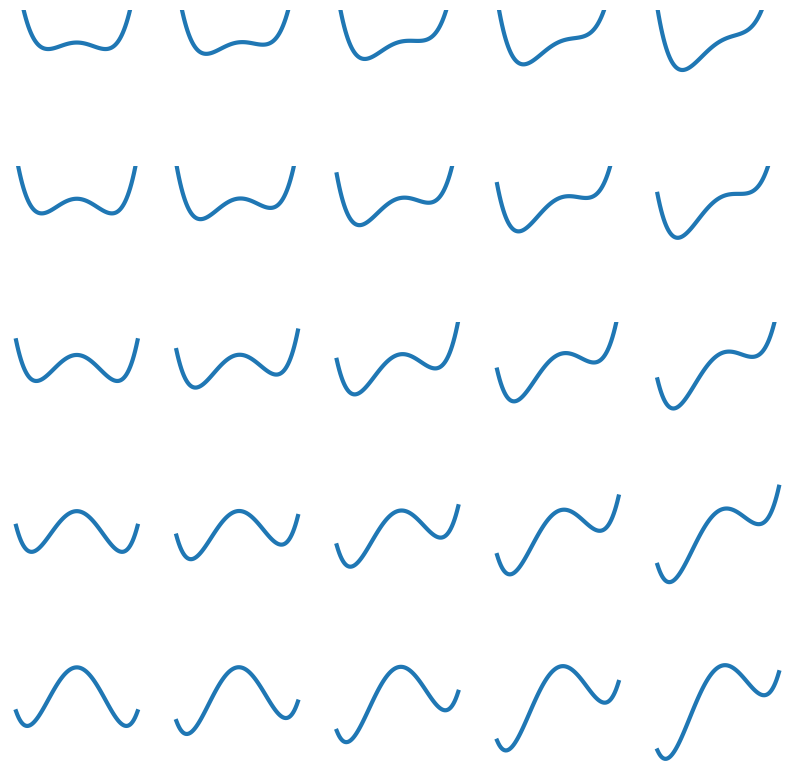

In [4]:
#Let us now plot a couple of potentials

def potential_cusp(x,p_i,t):
    return 0.1*(-0.05*np.max(t,0)*x + 5*(p_i)*x*x-0.25*x*x*x*x)




range_x=np.linspace(-3,3,100)

fig, ax = plt.subplots(5, 5, figsize = (10,10))
t=[0,10,20,30,40]
p=[0.2,0.3,0.4,0.5,0.6]
#Anterior Cell 1
for i in range(5):
    for j in range(5):
        ax[j,i].plot(range_x,-potential_cusp(range_x,p[j],t[i]))
        ax[j,i].set_ylim([-1.5,0.5])
        ax[j,i].axis('off')

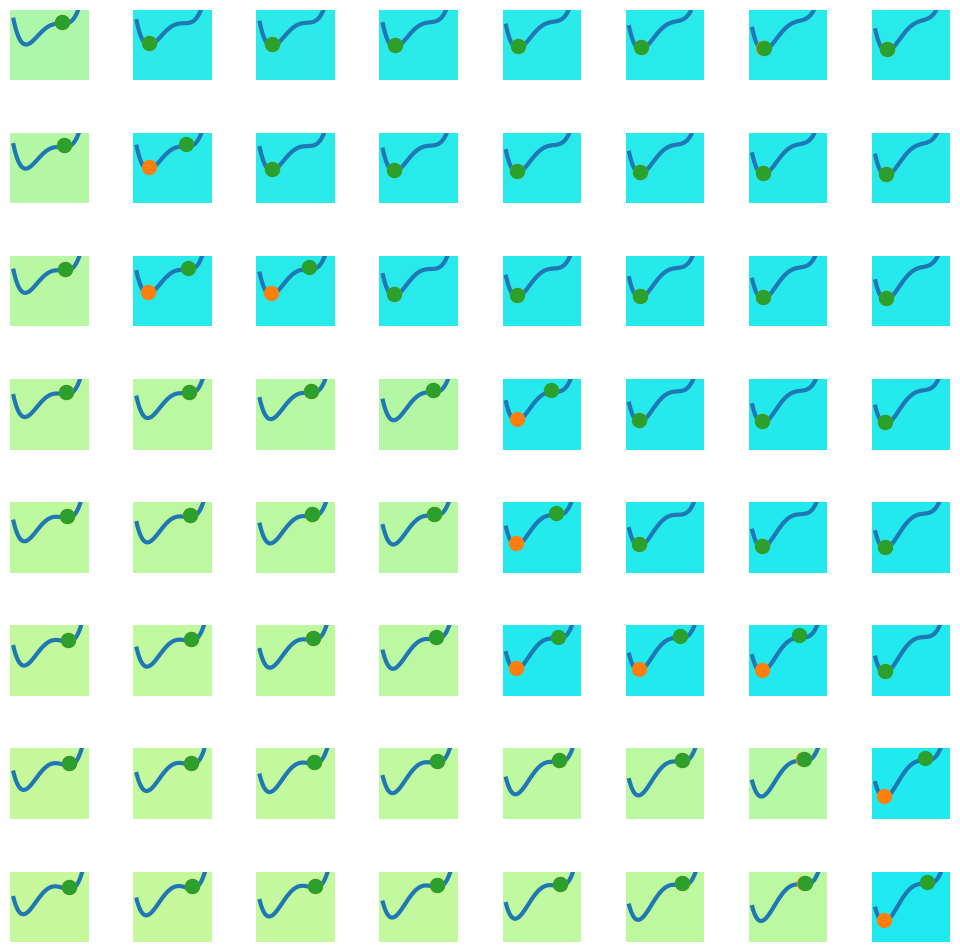

In [5]:
ode_param["omega_clock"]=0.3



l_max=8
t_max=8
def plot_landscape_bead(results_m,results_m_nc):
    range_x=np.linspace(-4,4,100)
    fig, ax = plt.subplots(l_max, t_max, figsize = (10,10))
    fig.tight_layout()
    p_f=np.linspace(0.49,0.3,l_max)
    for i in range(t_max):
        t_i= 87 +7*i
        time_l=int(t_i)
        for j in range(l_max):
                    ap=1-p_f[j]
                    position_l=int(p_f[j]*n_cells)
                    ax[j,i].plot(range_x,-potential_cusp(range_x,ap,time_l))
                    z_cw=results_m[position_l,int(t_i)]
                    ax[j,i].plot(z_cw,0.2-potential_cusp(z_cw,ap,time_l),'o',markersize=10)
                    z=results_m_nc[position_l,int(t_i)]
                    ax[j,i].plot(z,0.2-potential_cusp(z,ap,time_l),'.',markersize=20)
                    ax[j,i].set_ylim([-5,1.5])
                    weight=1-(z_cw+4)/8
                    ax[j,i].set_facecolor((1-weight,1-0.1*weight,0.5+0.5*weight))
                    ax[j,i].get_xaxis().set_ticks([])
                    ax[j,i].get_yaxis().set_ticks([])
                    ax[j,i].spines['top'].set_visible(False)
                    ax[j,i].spines['right'].set_visible(False)
                    ax[j,i].spines['bottom'].set_visible(False)
                    ax[j,i].spines['left'].set_visible(False)


plot_landscape_bead(results_cw,results_pw)

 

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


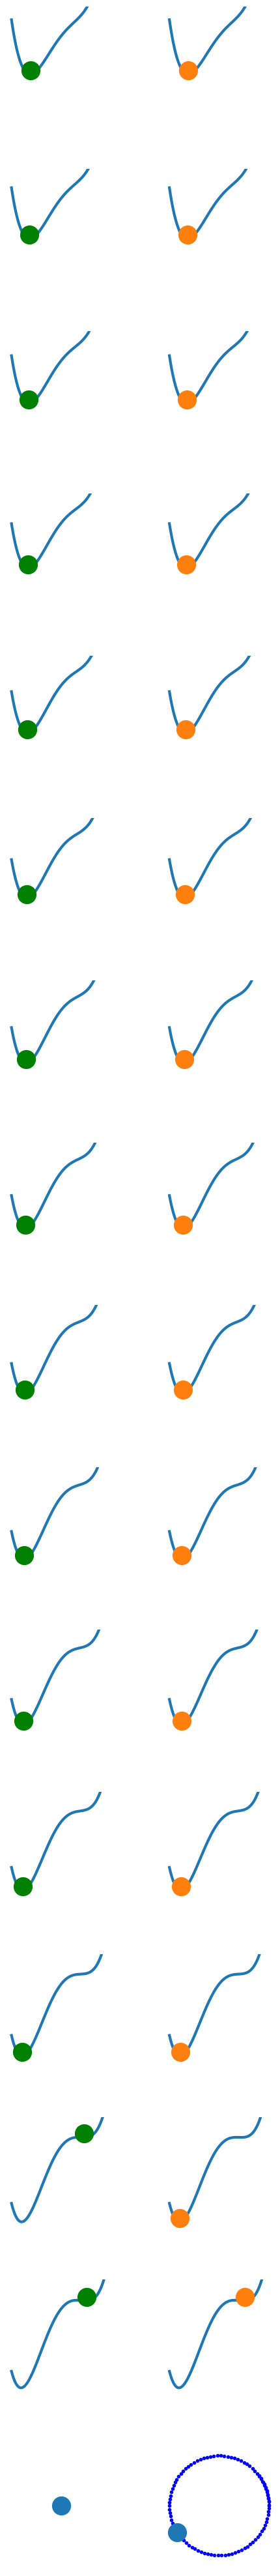

In [6]:
#Functions to make movies. WARNING : I USE  GLOBAL VARIABLES HERE TO SHARE FIGURES, ETC...



l_max=15
fig, ax = plt.subplots(l_max+1, 2, figsize = (5,40))
fig.tight_layout()


def make_frame(t):
    omega=ode_param["omega_clock"]
    range_x=np.linspace(-4,4,100)
    p_f=1-np.linspace(0.3,0.8,l_max)
    t_i=20*t
    ax[l_max,0].clear()
    ax[l_max,1].clear()
    ax[l_max,0].plot(0,0,'o',markersize=20)
    ax[l_max,0].axis('off')
    for i in range(100):
        #plot a trigonometric circle
        ax[l_max,1].plot(3*np.cos(0.07*i),3*np.sin(0.07*i),'.',color='b')
    time_l=int(t_i)
    omega=ode_param["omega_clock"]
    for j in range(l_max):
        ax[j,0].clear()
        ax[j,1].clear()
        ap=1-p_f[j]
        position_l=int(p_f[j]*n_cells)
        #plots potentials
        ax[j,1].plot(range_x,-potential_cusp(range_x,ap,time_l))
        ax[j,0].plot(range_x,-potential_cusp(range_x,ap,time_l))
        #plots position with clock
        z=results_cw[position_l,int(t_i)]
        ax[j,1].set_ylim([-5,1.5])
        ax[j,1].plot(z,0.2-potential_cusp(z,ap,time_l),'o',markersize=20)
        ax[j,1].axis('off')
        #plots position without clock
        z=results_pw[position_l,int(t_i)]
        ax[j,0].set_ylim([-5,1.5])
        ax[j,0].plot(z,0.2-potential_cusp(z,ap,time_l),'o',markersize=20, color = 'g')
        ax[j,0].axis('off')
        
    ax[l_max,1].plot(3*np.cos(omega*time_l),3*np.sin(omega*time_l),'o',markersize=20)
    ax[l_max,1].set_aspect('equal', adjustable='box')
    ax[l_max,1].axis('off')
    return mplfig_to_npimage(fig)




def make_movie():
    # creating animation
    animation = VideoClip(make_frame, duration = 8)
    # displaying animation with auto play and looping
    animation.ipython_display(fps = 20, loop = True, autoplay = True) 



make_movie()